In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# pip install seaborn
pd.set_option('display.max_columns', None)

In [56]:
df_ad=pd.read_csv('./meta_data_ad.csv')
df_ad.head()

,Campaign name,Ad Set Name,Ad name,Delivery status,Delivery level,Ad Set Name.1,Attribution setting,Amount spent (USD),Purchase ROAS (return on ad spend),Result type,...,Purchases,Purchases conversion value,Link clicks,Adds to cart,3-second video plays,2-second continuous video plays,Video plays,Views,Reporting starts,Reporting ends
0,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Crib-Mattress_Stacked-Mattresse...,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,1538.36,4.440833,Website purchases,...,14.0,6831.60,433.0,91.0,NaN,NaN,NaN,225152,1/19/2025,1/19/2025
1,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Bassinet_Studio-Angle_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,1249.93,2.449841,Website purchases,...,12.0,3062.13,633.0,66.0,236.0,NaN,2288.0,179852,1/19/2025,1/19/2025
2,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Bassinet_Studio-Front_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,949.04,1.561778,Website purchases,...,5.0,1482.19,387.0,57.0,NaN,NaN,NaN,125522,1/19/2025,1/19/2025
3,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Product-Mix_Product-Suite_VID_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,673.08,4.053916,Website purchases,...,10.0,2728.61,285.0,71.0,8752.0,NaN,54970.0,69510,1/19/2025,1/19/2025
4,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Crib-Mattress_Open-Mattress_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,522.03,4.906174,Website purchases,...,8.0,2561.17,150.0,50.0,NaN,NaN,NaN,65439,1/19/2025,1/19/2025


In [17]:
len(df_ad.columns.to_list())

37

In [19]:
df_ad['Campaign name'].nunique()

10

In [24]:
type_list={}
for i in df_ad.columns.to_list():
    if i not in type_list:
        type_list[df_ad[i].dtype]=1
    else:
        type_list[df_ad[i].dtype]=type_list[df_ad[i].dtype]+1
        
type_list


{dtype('O'): 1, dtype('float64'): 1, dtype('int64'): 1}

In [37]:
cat_cols=[]
num_cols=[]
for i in df_ad.columns.to_list():
    if df_ad[i].dtype=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)
        
# df_ad_cat=df_ad[cat_cols]
df_ad_num=df_ad[num_cols]

# cat_matrix=df_ad_cat.corr()
num_matrix=df_ad_num.corr()

In [38]:
num_matrix

,Amount spent (USD),Purchase ROAS (return on ad spend),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",CTR (link click-through rate),CPC (cost per link click),Video average play time,Cost per add to cart,Cost per checkout initiated,...,Reach,Impressions,Purchases,Purchases conversion value,Link clicks,Adds to cart,3-second video plays,2-second continuous video plays,Video plays,Views
Amount spent (USD),1.000000,-0.168358,0.446650,0.318187,-0.022336,-0.039253,-0.045374,-0.044794,0.115836,0.427967,...,0.987704,0.990284,0.678278,0.711265,0.941855,0.824487,0.522463,NaN,0.569658,0.990193
Purchase ROAS (return on ad spend),-0.168358,1.000000,-0.399392,-0.012800,0.210593,0.155461,-0.009232,0.020997,-0.247337,-0.205527,...,-0.188392,-0.169875,0.100831,0.108954,-0.166198,-0.015631,-0.219274,NaN,-0.225764,-0.169907
Cost per result,0.446650,-0.399392,1.000000,-0.063015,-0.457114,-0.311960,0.015040,-0.138027,0.434609,0.818573,...,0.491966,0.456713,-0.051552,-0.014829,0.426594,0.143798,0.490741,NaN,0.478252,0.459102
Frequency,0.318187,-0.012800,-0.063015,1.000000,0.085709,-0.111361,-0.042910,0.078986,-0.018809,0.023767,...,0.255525,0.272619,0.503729,0.500521,0.370631,0.491729,0.120446,NaN,0.128444,0.271737
"CPM (cost per 1,000 impressions)",-0.022336,0.210593,-0.457114,0.085709,1.000000,0.939535,-0.138975,0.540037,-0.177133,-0.088801,...,-0.042099,-0.036023,0.108430,0.065203,-0.038862,0.052512,-0.048774,NaN,-0.038760,-0.035565
CTR (link click-through rate),-0.039253,0.155461,-0.311960,-0.111361,0.939535,1.000000,-0.153275,0.525766,-0.202182,0.038634,...,-0.042172,-0.037814,0.193721,0.129212,-0.035876,0.090441,-0.054771,NaN,-0.050932,-0.037500
CPC (cost per link click),-0.045374,-0.009232,0.015040,-0.042910,-0.138975,-0.153275,1.000000,-0.171051,0.082486,-0.190757,...,-0.028808,-0.028696,-0.260702,-0.200251,-0.146299,-0.181505,-0.083860,NaN,-0.060423,-0.029188
Video average play time,-0.044794,0.020997,-0.138027,0.078986,0.540037,0.525766,-0.171051,1.000000,0.042270,-0.027654,...,-0.049366,-0.056022,0.172209,0.150197,-0.048558,-0.056559,0.099289,NaN,0.047681,-0.054233
Cost per add to cart,0.115836,-0.247337,0.434609,-0.018809,-0.177133,-0.202182,0.082486,0.042270,1.000000,0.112523,...,0.164806,0.136916,-0.172036,-0.146844,0.084490,-0.106370,0.303088,NaN,0.298873,0.137035
Cost per checkout initiated,0.427967,-0.205527,0.818573,0.023767,-0.088801,0.038634,-0.190757,-0.027654,0.112523,1.000000,...,0.459256,0.426429,0.136525,0.133986,0.497264,0.258185,0.440645,NaN,0.403085,0.427324


<AxesSubplot: >

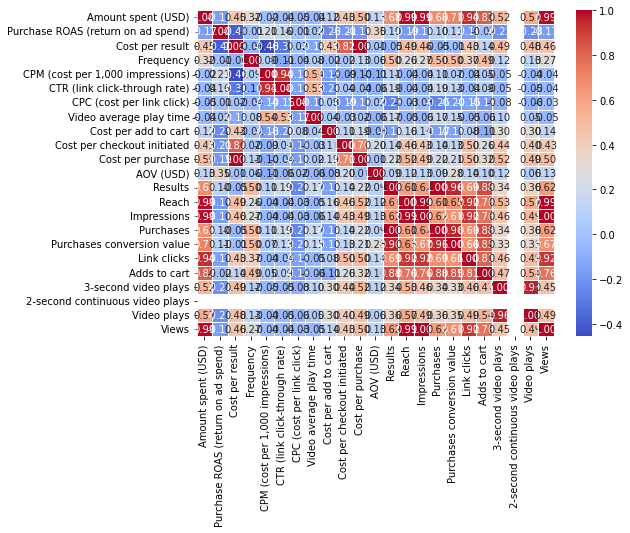

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [60]:
df_ad.head()

,Campaign name,Ad Set Name,Ad name,Delivery status,Delivery level,Ad Set Name.1,Attribution setting,Amount spent (USD),Purchase ROAS (return on ad spend),Result type,Cost per result,Frequency,"CPM (cost per 1,000 impressions)",CTR (link click-through rate),CPC (cost per link click),Thumbnail Effectiveness,Hook Rate,Stop Rate,Video average play time,Cost per add to cart,Cost per checkout initiated,Cost per purchase,CVR,AOV (USD),Results,Reach,Impressions,Purchases,Purchases conversion value,Link clicks,Adds to cart,3-second video plays,2-second continuous video plays,Video plays,Views,Reporting starts,Reporting ends
0,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Crib-Mattress_Stacked-Mattresse...,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,1538.36,4.440833,Website purchases,109.88,1.570031,6.852902,0.192888,3.552794,0.00%,NaN,0.00%,NaN,16.905055,76.918000,109.882857,3.23%,487.97,14.0,142980,224483,14.0,6831.60,433.0,91.0,NaN,NaN,NaN,225152,1/19/2025,1/19/2025
1,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Bassinet_Studio-Angle_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,1249.93,2.449841,Website purchases,104.16,1.549969,7.067062,0.357896,1.974613,1.29%,10.31%,0.13%,1.0,18.938333,156.241250,104.160833,1.90%,255.18,12.0,114110,176867,12.0,3062.13,633.0,66.0,236.0,NaN,2288.0,179852,1/19/2025,1/19/2025
2,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Bassinet_Studio-Front_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,949.04,1.561778,Website purchases,189.81,1.520484,7.572027,0.308772,2.452300,0.00%,NaN,0.00%,NaN,16.649825,135.577143,189.808000,1.29%,296.44,5.0,82431,125335,5.0,1482.19,387.0,57.0,NaN,NaN,NaN,125522,1/19/2025,1/19/2025
3,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Product-Mix_Product-Suite_VID_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,673.08,4.053916,Website purchases,67.31,1.224712,9.790539,0.414558,2.361684,79.96%,15.92%,12.73%,2.0,9.480000,48.077143,67.308000,3.51%,272.86,10.0,56134,68748,10.0,2728.61,285.0,71.0,8752.0,NaN,54970.0,69510,1/19/2025,1/19/2025
4,FB-Paid_Cold_Promo_Conversions_Baby_INC,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,JanPromo_20OFF_Crib-Mattress_Open-Mattress_IMG_CA,active,ad,Cold_US_18+_FB+IG_Promo_Purchases_Baby_Broad-INC,Incremental,522.03,4.906174,Website purchases,65.25,1.244307,8.001809,0.229924,3.480200,0.00%,NaN,0.00%,NaN,10.440600,43.502500,65.253750,5.33%,320.15,8.0,52430,65239,8.0,2561.17,150.0,50.0,NaN,NaN,NaN,65439,1/19/2025,1/19/2025


In [194]:
df_ad['Ad Set Name'].nunique()

15

In [67]:
df_ad_copy=df_ad.copy()
df_ad_copy['match']=df_ad_copy['Results']==df_ad_copy['Purchases']
df_ad_copy['match'].value_counts()

False    187
True      82
Name: match, dtype: int64

In [89]:
# df_ad_copy[df_ad_copy['match']==False]['Purchases'].value_counts()

In [180]:
df_ad_campaign=df_ad.groupby('Campaign name').agg(amount_spent=('Amount spent (USD)', 'sum'), results=('Results', 'sum'), 
                                  impressions=('Impressions', 'sum'), reach=('Reach', 'sum'), purchases=('Purchases', 'sum'), 
                                   purchase_conversion_value=('Purchases conversion value', 'sum'), 
                                   link_clicks=('Link clicks', 'sum'), adds_to_cart=('Adds to cart', 'sum')).reset_index()

In [181]:
df_ad_campaign['cost_per_result']=df_ad_campaign['amount_spent'] / df_ad_campaign['results']
df_ad_campaign['cost_per_1000_impressions']=(df_ad_campaign['amount_spent'] / df_ad_campaign['impressions']) * 1000
df_ad_campaign['CTR']=df_ad_campaign['link_clicks'] / df_ad_campaign['impressions']
df_ad_campaign['cost_per_link_click']=df_ad_campaign['amount_spent'] / df_ad_campaign['link_clicks']
df_ad_campaign['cost_per_add_to_cart']=df_ad_campaign['amount_spent'] / df_ad_campaign['adds_to_cart']
df_ad_campaign['cvr']=df_ad_campaign['results'] / df_ad_campaign['link_clicks']
df_ad_campaign['aov']=df_ad_campaign['purchase_conversion_value'] / df_ad_campaign['purchases']
df_ad_campaign['roas']=df_ad_campaign['purchase_conversion_value'] / df_ad_campaign['amount_spent']

df_ad_campaign['profit']=df_ad_campaign['purchase_conversion_value'] - df_ad_campaign['amount_spent']

# df_ad_campaign['purchase_per_tot_result']=df_ad_campaign['purchases']/(df_ad_campaign['purchases']+df_ad_campaign['results'])

In [182]:
roas_wise_campaign=df_ad_campaign.sort_values(by='roas', ascending=False)[['Campaign name', 'roas']]
roas_wise_campaign.to_csv('C://Users//Administrator//Documents//Marekting Campaign analysis//analysis.csv')

In [183]:
good_camps=roas_wise_campaign['Campaign name'][0:7].to_list()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16220\900809702.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  good_camps=roas_wise_campaign['Campaign name'][0:7].to_list()


In [184]:
df_ad_camp=df_ad_campaign.sort_values(by='roas', ascending=False)
df_ad_camp=df_ad_camp[df_ad_camp['Campaign name'].isin(good_camps)]
df_ad_camp

,Campaign name,amount_spent,results,impressions,reach,purchases,purchase_conversion_value,link_clicks,adds_to_cart,cost_per_result,cost_per_1000_impressions,CTR,cost_per_link_click,cost_per_add_to_cart,cvr,aov,roas,profit
7,FB-Paid_Hot_Promo_Conversions_7DC,529.44,26.0,47470,33066,26.0,6719.17,305.0,120.0,20.363077,11.153149,0.006425,1.735869,4.412000,0.085246,258.429615,12.691089,6189.73
6,FB-Paid_Hot_Conversions_BAU_7DC,240.01,11.0,20933,16119,11.0,2860.32,261.0,32.0,21.819091,11.465628,0.012468,0.919579,7.500312,0.042146,260.029091,11.917503,2620.31
0,FB-Paid_Cold_Advantage+Shopping_Conversions_No...,1409.56,42.0,123491,80265,42.0,13833.03,500.0,221.0,33.560952,11.414273,0.004049,2.819120,6.378100,0.084000,329.357857,9.813722,12423.47
9,FB-Paid_Warm_Promo_Conversions_INC,1132.14,29.0,106569,72437,29.0,9102.05,597.0,198.0,39.039310,10.623540,0.005602,1.896382,5.717879,0.048576,313.863793,8.039686,7969.91
8,FB-Paid_Warm_Acquisition_Conversions_INC,593.33,12.0,51737,38685,12.0,4065.03,286.0,75.0,49.444167,11.468195,0.005528,2.074580,7.911067,0.041958,338.752500,6.851213,3471.70
4,FB-Paid_Cold_Promo_Conversions_Baby_INC,6033.01,67.0,800695,563453,67.0,21900.04,2262.0,430.0,90.044925,7.534717,0.002825,2.667113,14.030256,0.029620,326.866269,3.630035,15867.03
1,FB-Paid_Cold_Awareness-No-Engagers_Conversions...,1834.51,11.0,302283,261031,11.0,4499.85,1008.0,70.0,166.773636,6.068849,0.003335,1.819950,26.207286,0.010913,409.077273,2.452889,2665.34


In [185]:
df_ad_camp_profit=df_ad_camp[['Campaign name', 'profit']]
df_ad_camp_profit.sort_values(by='profit', ascending =False)
# df_ad_camp_profit.to_csv('C://Users//Administrator//Documents//Marekting Campaign analysis//campaign_profit.csv')

,Campaign name,profit
4,FB-Paid_Cold_Promo_Conversions_Baby_INC,15867.03
0,FB-Paid_Cold_Advantage+Shopping_Conversions_No...,12423.47
9,FB-Paid_Warm_Promo_Conversions_INC,7969.91
7,FB-Paid_Hot_Promo_Conversions_7DC,6189.73
8,FB-Paid_Warm_Acquisition_Conversions_INC,3471.70
1,FB-Paid_Cold_Awareness-No-Engagers_Conversions...,2665.34
6,FB-Paid_Hot_Conversions_BAU_7DC,2620.31


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


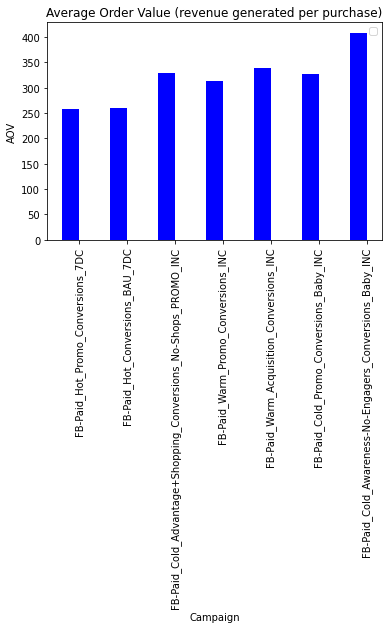

In [186]:
x = np.arange(len(good_camps))

bar_width = 0.35

fig, ax = plt.subplots()

bars1 = ax.bar(x - bar_width / 2, df_ad_camp['aov'], bar_width ,color='b')

# bars2 = ax.bar(x + bar_width / 2, df_ad_camp['cost_per_link_click'], bar_width, label='impressions', color='r')

ax.set_xlabel('Campaign')
ax.set_ylabel('AOV')
ax.set_title('Average Order Value (revenue generated per purchase)')
ax.set_xticks(x)
ax.set_xticklabels(good_camps)
plt.xticks(rotation=90)
ax.legend()

plt.show()


In [221]:
df_ad_copy=df_ad.copy()
df_ad_copy['is_in_good_camps']=df_ad_copy['Campaign name'].apply(lambda x: x in good_camps)

In [232]:
# df_ad_copy['Thumbnail Effectiveness']=df_ad_copy['Thumbnail Effectiveness'].apply(lambda x: float(x.replace('%', '')))
df_ad_copy['Hook Rate']=df_ad_copy['Hook Rate'].apply(lambda x: float(x.replace('%', '')) if pd.isna(x)==False else x)
# df_ad_copy['Stop Rate']=df_ad_copy['Stop Rate'].apply(lambda x: float(x.replace('%', '')))

In [233]:
df_ad_ad=df_ad_copy.groupby('Ad name').agg(amount_spent=('Amount spent (USD)', 'sum'), results=('Results', 'sum'), 
                                  impressions=('Impressions', 'sum'), reach=('Reach', 'sum'), purchases=('Purchases', 'sum'), 
                                   purchase_conversion_value=('Purchases conversion value', 'sum'), 
                                   link_clicks=('Link clicks', 'sum'), adds_to_cart=('Adds to cart', 'sum'),
                                tn_effect=('Thumbnail Effectiveness', 'mean'),hook_rate=('Hook Rate', 'mean'),
                                           stop_rate=('Stop Rate', 'mean'),
                                    avg_good_camp=('is_in_good_camps', 'mean')).reset_index()

In [234]:
df_ad_ad['cost_per_result']=df_ad_ad['amount_spent'] / df_ad_ad['results']
df_ad_ad['cost_per_1000_impressions']=(df_ad_ad['amount_spent'] / df_ad_ad['impressions']) * 1000
df_ad_ad['CTR']=df_ad_ad['link_clicks'] / df_ad_ad['impressions']
df_ad_ad['cost_per_link_click']=df_ad_ad['amount_spent'] / df_ad_ad['link_clicks']
df_ad_ad['cost_per_add_to_cart']=df_ad_ad['amount_spent'] / df_ad_ad['adds_to_cart']
df_ad_ad['cvr']=df_ad_ad['results'] / df_ad_ad['link_clicks']
df_ad_ad['aov']=df_ad_ad['purchase_conversion_value'] / df_ad_ad['purchases']
df_ad_ad['roas']=df_ad_ad['purchase_conversion_value'] / df_ad_ad['amount_spent']

df_ad_ad['profit']=df_ad_ad['purchase_conversion_value'] - df_ad_ad['amount_spent']

In [235]:
ss=df_ad_ad['results'].value_counts().reset_index().rename(columns={'index':'results', 'results':'no of unique ads'})
# ss.to_csv('C://Users//Administrator//Documents//Marekting Campaign analysis//ads_results.csv')

PermissionError: [Errno 13] Permission denied: 'C:/Users/Administrator/Documents/Marekting Campaign analysis/ads_results.csv'

In [240]:
qwe=df_ad_ad[df_ad_ad['results']>=10]
qwe=qwe.sort_values(by='purchase_conversion_value', ascending=False)
qwe.to_csv('C://Users//Administrator//Documents//Marekting Campaign analysis//ads_result_2.csv')
# df_ad_ad[df_ad_ad['results']==0]

In [209]:
df_ad_ad['results'].value_counts()

0.0     144
1.0      11
2.0       6
3.0       3
6.0       3
5.0       3
7.0       2
15.0      1
23.0      1
12.0      1
4.0       1
9.0       1
27.0      1
19.0      1
11.0      1
Name: results, dtype: int64

In [101]:
# plt.figure(figsize=(10, 8))
# plt.plot(df_ad_campaign['Campaign name'], df_ad_campaign['roas'], color='red')
# plt.xlabel('Campaign')
# plt.ylabel('ROAS')
# plt.xticks(rotation=45)
# plt.show()